In [1]:
import pandas as pd 
import numpy as np

In [2]:
playstore = pd.read_csv('/Users/nimisha/Desktop/Purdue/Python/googleplaystore.csv')

In [3]:
playstore.drop_duplicates(inplace = True)

In [4]:
playstore.columns = playstore.columns.str.lower().str.replace(' ', '_')

In [5]:
playstore.drop(index = playstore[playstore.category == '1.9'].index, inplace=True)

In [6]:
playstore.reviews = playstore.reviews.astype(int)

In [7]:
def clean_size(size):
    size = size.lower()
    if 'm' in size :
        res = size.replace('m','')
        res = float(res)*1024
    elif 'k' in size:
        res = size.replace('k','')
        res = float(res)
    elif size == 'varies with device' :
        res = np.NaN
    else : 
        res = float(size)
    return res

In [8]:
playstore['size'] = playstore['size'].apply(clean_size)

In [9]:
playstore.installs = playstore.installs.str.replace('[+,]','').astype(int)

In [10]:
playstore.price= playstore.price.str.replace('$', '').astype('float')

In [11]:
from datetime import datetime as dt
playstore.last_updated= playstore.last_updated.apply(lambda x : dt.strptime(x, '%B %d, %Y') )

In [12]:
# statistical analysis 
# missing values
# Aggregation
# Visualization 

# Statistical Analysis 

    - count frequency
    - Measure of Central Tendencies
    - Measure of Spread

In [13]:
playstore.category.nunique()

33

In [14]:
playstore.category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
playstore.genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## Count for each category of a column 

In [16]:
playstore.category.value_counts(dropna = False)

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: category, dtype: int64

In [17]:
playstore.rating.value_counts(dropna = False, sort = True)

NaN    1465
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      12
1.7       8
1.8       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: rating, dtype: int64

In [18]:
pd.crosstab(playstore.category, playstore.type)

type,Free,Paid
category,,
ART_AND_DESIGN,62,3
AUTO_AND_VEHICLES,82,3
BEAUTY,53,0
BOOKS_AND_REFERENCE,202,28
BUSINESS,415,12
COMICS,60,0
COMMUNICATION,339,27
DATING,189,7
EDUCATION,126,4


# Measures of Central Tendencies 

In [19]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             10357 non-null  object        
 1   category        10357 non-null  object        
 2   rating          8892 non-null   float64       
 3   reviews         10357 non-null  int64         
 4   size            8831 non-null   float64       
 5   installs        10357 non-null  int64         
 6   type            10356 non-null  object        
 7   price           10357 non-null  float64       
 8   content_rating  10357 non-null  object        
 9   genres          10357 non-null  object        
 10  last_updated    10357 non-null  datetime64[ns]
 11  current_ver     10349 non-null  object        
 12  android_ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [20]:
playstore.mean() # it will ccompute mean only for int or float columns

rating      4.187877e+00
reviews     4.059046e+05
size        2.179831e+04
installs    1.415776e+07
price       1.030800e+00
dtype: float64

In [21]:
playstore.median() 

rating           4.3
reviews       1680.0
size         13312.0
installs    100000.0
price            0.0
dtype: float64

In [22]:
playstore.mode()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,ROBLOX,FAMILY,4.4,0,11264.0,1000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,4.1 and up


In [23]:
playstore.max() # for string it gives based on alphabetic character

app               🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
category                                                   WEATHER
rating                                                           5
reviews                                                   78158306
size                                                        102400
installs                                                1000000000
price                                                          400
content_rating                                             Unrated
genres                                                        Word
last_updated                                   2018-08-08 00:00:00
dtype: object

In [24]:
playstore.min()

app               "i DT" Fútbol. Todos Somos Técnicos.
category                                ART_AND_DESIGN
rating                                               1
reviews                                              0
size                                               8.5
installs                                             0
price                                                0
content_rating                         Adults only 18+
genres                                          Action
last_updated                       2010-05-21 00:00:00
dtype: object

In [25]:
playstore.select_dtypes(include = ['int', 'float'] ).max()

rating      5.000000e+00
reviews     7.815831e+07
size        1.024000e+05
installs    1.000000e+09
price       4.000000e+02
dtype: float64

In [26]:
playstore.select_dtypes(include = ['int', 'float'] ).min()

rating      1.0
reviews     0.0
size        8.5
installs    0.0
price       0.0
dtype: float64

In [27]:
playstore.select_dtypes(exclude= ['int', 'float'] )

,app,category,type,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [28]:
playstore.var()

rating      2.728774e-01
reviews     7.272611e+12
size        5.327587e+08
installs    6.438386e+15
price       2.649936e+02
dtype: float64

In [29]:
playstore.std()

rating      5.223767e-01
reviews     2.696778e+06
size        2.308157e+04
installs    8.023955e+07
price       1.627863e+01
dtype: float64

In [30]:
playstore.describe() # selects only nummerical i.e. int  & float columns

,rating,reviews,size,installs,price
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,21798.311052,1.415776e+07,1.030800
std,0.522377,2.696778e+06,23081.565229,8.023955e+07,16.278625
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,4812.800000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13312.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29696.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


In [31]:
playstore.quantile() # default gives median value

rating           4.3
reviews       1680.0
size         13312.0
installs    100000.0
price            0.0
Name: 0.5, dtype: float64

In [32]:
playstore.quantile([0,0.25, 0.5, 0.75, 1])

,rating,reviews,size,installs,price
0.00,1.0,0.0,8.5,0.000000e+00,0.0
0.25,4.0,32.0,4812.8,1.000000e+03,0.0
0.50,4.3,1680.0,13312.0,1.000000e+05,0.0
0.75,4.5,46416.0,29696.0,1.000000e+06,0.0
1.00,5.0,78158306.0,102400.0,1.000000e+09,400.0


In [33]:
playstore['Quantile']= pd.qcut(playstore.reviews, q = 4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])

In [34]:
playstore[['reviews', 'Quantile']]

,reviews,Quantile
0,159,Q2
1,967,Q2
2,87510,Q4
3,215644,Q4
4,967,Q2
...,...,...
10836,38,Q2
10837,4,Q1
10838,3,Q1
10839,114,Q2


## Aggregation12

In [74]:
grouped = playstore.groupby('Quantile')

In [75]:
grouped

In [76]:
grouped.ngroups

4

In [77]:
grouped.groups

{'Q1': Int64Index([   17,    44,   114,   128,   132,   134,   180,   227,   328,
               329,
             ...
             10816, 10820, 10821, 10822, 10823, 10825, 10834, 10835, 10837,
             10838],
            dtype='int64', length=2593),
 'Q2': Int64Index([    0,     1,     4,     5,     6,     9,    14,    15,    20,
                21,
             ...
             10824, 10827, 10828, 10829, 10830, 10831, 10832, 10833, 10836,
             10839],
            dtype='int64', length=2586),
 'Q3': Int64Index([    7,     8,    10,    11,    12,    13,    16,    22,    26,
                32,
             ...
             10750, 10753, 10758, 10792, 10793, 10795, 10797, 10799, 10804,
             10815],
            dtype='int64', length=2589),
 'Q4': Int64Index([    2,     3,    18,    19,    42,    45,    69,    70,    72,
                79,
             ...
             10729, 10731, 10740, 10781, 10784, 10796, 10803, 10809, 10826,
             10840],
            d

In [78]:
grouped.get_group('Q1')

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,Quantile
17,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17408.0,10000,Free,0.0,Everyone,Art & Design,2017-11-07,1.0,2.3 and up,Q1
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.2,26,12288.0,10000,Free,0.0,Everyone,Art & Design,2018-01-03,1.0.0,4.1 and up,Q1
114,Eyes Makeup Beauty Tips,BEAUTY,4.2,30,2969.6,10000,Free,0.0,Everyone,Beauty,2018-04-09,3.3.9,4.0.3 and up,Q1
128,Makeup Videos,BEAUTY,3.8,9,3481.6,5000,Free,0.0,Everyone,Beauty,2018-06-07,1.0,4.0 and up,Q1
132,Eyeliner step by step 2018,BEAUTY,4.3,18,3276.8,5000,Free,0.0,Everyone,Beauty,2018-06-01,1.2.13,4.0.3 and up,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7884.8,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0 and up,Q1
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,Q1
10835,FR Forms,BUSINESS,NaN,0,9830.4,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up,Q1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,Q1


In [79]:
grouped.mean()

,rating,reviews,size,installs,price
Quantile,,,,,
Q1,4.141162,7.497879e+00,14091.330974,1.442085e+03,1.218951
Q2,4.032585,4.098724e+02,16365.518520,5.451284e+04,2.305093
Q3,4.190062,1.495212e+04,24929.914986,1.568716e+06,0.567995
Q4,4.357397,1.608406e+06,37293.744200,5.501190e+07,0.032348


In [80]:
playstore.mean()

rating      4.187877e+00
reviews     4.059046e+05
size        2.179831e+04
installs    1.415776e+07
price       1.030800e+00
dtype: float64

In [81]:
grouped.median()

,rating,reviews,size,installs,price
Quantile,,,,,
Q1,4.3,4,8192.0,100,0.0
Q2,4.2,221,8806.4,10000,0.0
Q3,4.2,10460,17408.0,1000000,0.0
Q4,4.4,267636,29696.0,10000000,0.0


In [82]:
playstore.groupby('Quantile').mean()

,rating,reviews,size,installs,price
Quantile,,,,,
Q1,4.141162,7.497879e+00,14091.330974,1.442085e+03,1.218951
Q2,4.032585,4.098724e+02,16365.518520,5.451284e+04,2.305093
Q3,4.190062,1.495212e+04,24929.914986,1.568716e+06,0.567995
Q4,4.357397,1.608406e+06,37293.744200,5.501190e+07,0.032348


In [83]:
playstore.groupby('Quantile').median()

,rating,reviews,size,installs,price
Quantile,,,,,
Q1,4.3,4,8192.0,100,0.0
Q2,4.2,221,8806.4,10000,0.0
Q3,4.2,10460,17408.0,1000000,0.0
Q4,4.4,267636,29696.0,10000000,0.0


In [85]:
playstore.groupby('Quantile').agg(['mean','median', 'var'])

rating                        reviews                        \
              mean median       var          mean  median           var   
Quantile                                                                  
Q1        4.141162    4.3  0.722358  7.497879e+00       4  7.480102e+01   
Q2        4.032585    4.2  0.349126  4.098724e+02     221  1.800274e+05   
Q3        4.190062    4.2  0.148052  1.495212e+04   10460  1.569015e+08   
Q4        4.357397    4.4  0.059301  1.608406e+06  267636  2.717268e+13   

                  size                             installs            \
                  mean   median           var          mean    median   
Quantile                                                                
Q1        14091.330974   8192.0  2.641351e+08  1.442085e+03       100   
Q2        16365.518520   8806.4  3.461914e+08  5.451284e+04     10000   
Q3        24929.914986  17408.0  5.566377e+08  1.568716e+06   1000000   
Q4        37293.744200  29696.0  7.942519e+08  5.501190e+07  10000000   

                           price                     
                   var      mean median         var  
Quantile                                             
Q1        4.032809e+08  1.218951    0.0  223.796266  
Q2        5.075536e+10  2.305093    0.0  708.409958  
Q3        2.536783e+13  0.567995    0.0  125.634793  
Q4        2.351029e+16  0.032348    0.0    0.148807

In [86]:
playstore.Quantile.mode()

0    Q1
Name: Quantile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [88]:
playstore.groupby('Quantile').agg('mean')[['rating', 'reviews']]

,rating,reviews
Quantile,,
Q1,4.141162,7.497879e+00
Q2,4.032585,4.098724e+02
Q3,4.190062,1.495212e+04
Q4,4.357397,1.608406e+06


In [94]:
playstore.groupby('Quantile').agg({'reviews' : ['mean', 'std'], 'rating' : ['median', 'var']})

reviews               rating          
                  mean           std median       var
Quantile                                             
Q1        7.497879e+00  8.648758e+00    4.3  0.722358
Q2        4.098724e+02  4.242964e+02    4.2  0.349126
Q3        1.495212e+04  1.252603e+04    4.2  0.148052
Q4        1.608406e+06  5.212743e+06    4.4  0.059301

In [95]:
# apply a user defined function ???

In [96]:
def data_range(x):
    return x.max() - x.min()
data_range = lambda x :x.max() - x.min()

In [97]:
playstore.groupby('Quantile').agg({'reviews' : ['mean', 'std'], 'rating' : ['median', data_range]})

reviews               rating           
                  mean           std median data_range
Quantile                                              
Q1        7.497879e+00  8.648758e+00    4.3        4.0
Q2        4.098724e+02  4.242964e+02    4.2        3.8
Q3        1.495212e+04  1.252603e+04    4.2        3.1
Q4        1.608406e+06  5.212743e+06    4.4        2.1

In [101]:
data_range(playstore[playstore.Quantile== 'Q1'].rating)

4.0

In [107]:
data =playstore.groupby('Quantile').agg({'reviews' : ['mean', 'std', 'max', 'min', lambda x: x.max() - x.min(), 
                                                      lambda x: x.max() - x.min(),
                                                      lambda x: x.max() - x.min()], 
                                         'rating' : ['median', lambda x: x.max() - x.min()]})

In [116]:
data[[('reviews', 'mean')]]


,reviews
,mean
Quantile,
Q1,7.497879e+00
Q2,4.098724e+02
Q3,1.495212e+04
Q4,1.608406e+06


In [113]:
data.rename(columns={'<lambda_0>' : 'range'})

reviews                                                      \
                  mean           std       max    min     range <lambda_1>   
Quantile                                                                     
Q1        7.497879e+00  8.648758e+00        32      0        32         32   
Q2        4.098724e+02  4.242964e+02      1680     33      1647       1647   
Q3        1.495212e+04  1.252603e+04     46416   1686     44730      44730   
Q4        1.608406e+06  5.212743e+06  78158306  46505  78111801   78111801   

                    rating        
         <lambda_2> median range  
Quantile                          
Q1               32    4.3   4.0  
Q2             1647    4.2   3.8  
Q3            44730    4.2   3.1  
Q4         78111801    4.4   2.1

In [126]:
playstore.groupby(['category', 'type'])[['price']].agg('max')

price
category          type       
ART_AND_DESIGN    Free   0.00
                  Paid   1.99
AUTO_AND_VEHICLES Free   0.00
                  Paid   9.99
BEAUTY            Free   0.00
...                       ...
TRAVEL_AND_LOCAL  Paid   8.99
VIDEO_PLAYERS     Free   0.00
                  Paid   5.99
WEATHER           Free   0.00
                  Paid   6.99

[63 rows x 1 columns]

In [131]:
playstore.pivot_table(index = 'category',
                     columns='content_rating',
                     values= 'price',
                     aggfunc='max')

content_rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
category,,,,,,
ART_AND_DESIGN,NaN,1.99,0.00,NaN,0.00,NaN
AUTO_AND_VEHICLES,NaN,9.99,0.00,NaN,0.00,NaN
BEAUTY,NaN,0.00,0.00,0.00,0.00,NaN
BOOKS_AND_REFERENCE,NaN,6.49,0.00,0.00,2.99,NaN
BUSINESS,NaN,89.99,0.00,0.00,0.00,NaN
COMICS,0.0,0.00,0.00,0.00,0.00,NaN
COMMUNICATION,NaN,19.99,NaN,0.99,0.00,NaN
DATING,NaN,6.99,NaN,7.99,3.99,NaN
EDUCATION,NaN,5.99,0.00,0.00,0.00,NaN


In [143]:
playstore.groupby(['category', 'content_rating'])[['price']].agg(lambda x : x.max()-x.min()).unstack()

price                                           \
content_rating      Adults only 18+ Everyone Everyone 10+ Mature 17+    Teen   
category                                                                       
ART_AND_DESIGN                  NaN     1.99         0.00        NaN    0.00   
AUTO_AND_VEHICLES               NaN     9.99         0.00        NaN    0.00   
BEAUTY                          NaN     0.00         0.00       0.00    0.00   
BOOKS_AND_REFERENCE             NaN     6.49         0.00       0.00    2.99   
BUSINESS                        NaN    89.99         0.00       0.00    0.00   
COMICS                          0.0     0.00         0.00       0.00    0.00   
COMMUNICATION                   NaN    19.99          NaN       0.99    0.00   
DATING                          NaN     6.99          NaN       7.99    3.99   
EDUCATION                       NaN     5.99         0.00       0.00    0.00   
ENTERTAINMENT                   NaN     4.99         0.00       2.99    0.00   
EVENTS                          NaN   109.99         0.00        NaN    0.00   
FAMILY                          NaN   399.99        19.99      29.99   14.99   
FINANCE                         NaN   399.99          NaN        NaN  399.99   
FOOD_AND_DRINK                  NaN     4.99         0.00        NaN    0.00   
GAME                            NaN     7.99        17.99       6.99   16.99   
HEALTH_AND_FITNESS              NaN     9.99         0.00       0.00    0.00   
HOUSE_AND_HOME                  NaN     0.00          NaN        NaN    0.00   
LIBRARIES_AND_DEMO              NaN     0.99          NaN        NaN     NaN   
LIFESTYLE                       NaN   400.00         0.00       4.99    0.99   
MAPS_AND_NAVIGATION             NaN    11.99         0.00       0.00    0.00   
MEDICAL                         NaN   200.00        10.00      11.99    5.00   
NEWS_AND_MAGAZINES              NaN     2.99         0.00       0.99    0.00   
PARENTING                       NaN     4.99          NaN       0.00    0.00   
PERSONALIZATION                 NaN     9.99         0.00       0.00    0.00   
PHOTOGRAPHY                     NaN    29.99          NaN       0.00    0.00   
PRODUCTIVITY                    NaN   154.99         0.00       0.00    0.00   
SHOPPING                        NaN     2.99          NaN       0.00    0.00   
SOCIAL                          NaN     0.99         0.00       0.00   13.99   
SPORTS                          0.0    29.99         0.00       0.00    0.00   
TOOLS                           NaN    25.99          NaN       2.99    0.00   
TRAVEL_AND_LOCAL                NaN     8.99          NaN       0.00    0.00   
VIDEO_PLAYERS                   NaN     5.99         0.00       0.00    0.00   
WEATHER                         NaN     6.99         0.00       0.00    0.00   

                             
content_rating      Unrated  
category                     
ART_AND_DESIGN          NaN  
AUTO_AND_VEHICLES       NaN  
BEAUTY                  NaN  
BOOKS_AND_REFERENCE     NaN  
BUSINESS                NaN  
COMICS                  NaN  
COMMUNICATION           NaN  
DATING                  NaN  
EDUCATION               NaN  
ENTERTAINMENT           NaN  
EVENTS                  NaN  
FAMILY                  0.0  
FINANCE                 NaN  
FOOD_AND_DRINK          NaN  
GAME                    NaN  
HEALTH_AND_FITNESS      NaN  
HOUSE_AND_HOME          NaN  
LIBRARIES_AND_DEMO      NaN  
LIFESTYLE               NaN  
MAPS_AND_NAVIGATION     NaN  
MEDICAL                 NaN  
NEWS_AND_MAGAZINES      NaN  
PARENTING               NaN  
PERSONALIZATION         NaN  
PHOTOGRAPHY             NaN  
PRODUCTIVITY            NaN  
SHOPPING                NaN  
SOCIAL                  NaN  
SPORTS                  NaN  
TOOLS                   0.0  
TRAVEL_AND_LOCAL        NaN  
VIDEO_PLAYERS           NaN  
WEATHER                 NaN

In [147]:
playstore.pivot_table(index = 'type',
                     columns='content_rating',
                     values= 'reviews',
                     aggfunc= lambda x : x.max() - x.min(),
                     fill_value='-')

content_rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
type,,,,,,
Free,42691,69119316.0,44893888.0,11667403.0,78158306.0,1185
Paid,-,190086.0,2376553.0,408292.0,100805.0,-


## Missing Values 

### detect Missing values ??

In [148]:
playstore.isnull()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,Quantile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [152]:
playstore.isnull().sum(axis = 0) # no. of missing values by column 

app                  0
category             0
rating            1465
reviews              0
size              1526
installs             0
type                 1
price                0
content_rating       0
genres               0
last_updated         0
current_ver          8
android_ver          2
Quantile             0
dtype: int64

In [151]:
True + True+ True + False + False + False + True

4

In [155]:
playstore.shape

(10357, 14)

In [154]:
playstore.dropna().shape

(7418, 14)

# Visual  Exploration of data

In [ ]:
# Prediction
# identify the target variable ??

## Target variable : rating 

In [156]:
playstore.rating.describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [157]:
# missing values in rating this cleaning step is only for the project trying predict the target 

In [158]:
playstore.rating.isnull().sum()

1465

In [175]:
playstore_na = playstore.dropna(subset = ['rating'])

In [177]:
playstore_na.shape

(8892, 13)

In [176]:
playstore_na.rating.isnull().sum()

0

In [179]:
playstore.rating.nunique()

39

In [183]:
import matplotlib.pyplot as plt

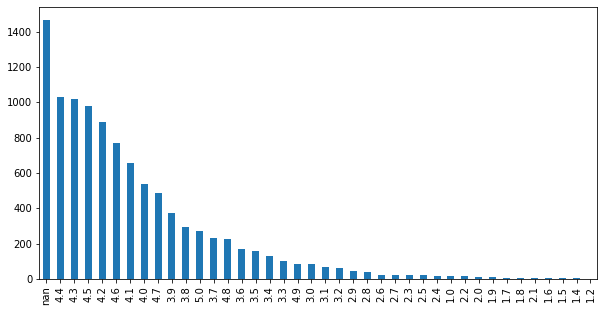

In [186]:
plt.figure(figsize = (10,5))
playstore.rating.value_counts(dropna = False).plot.bar()
plt.show()

### category ???

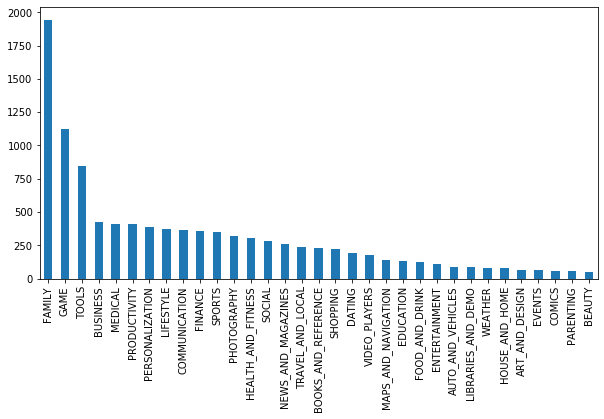

In [188]:
plt.figure(figsize = (10,5))
playstore.category.value_counts(dropna = False).plot.bar()
plt.show()

In [189]:
# TOp5 ?? top 10 ??

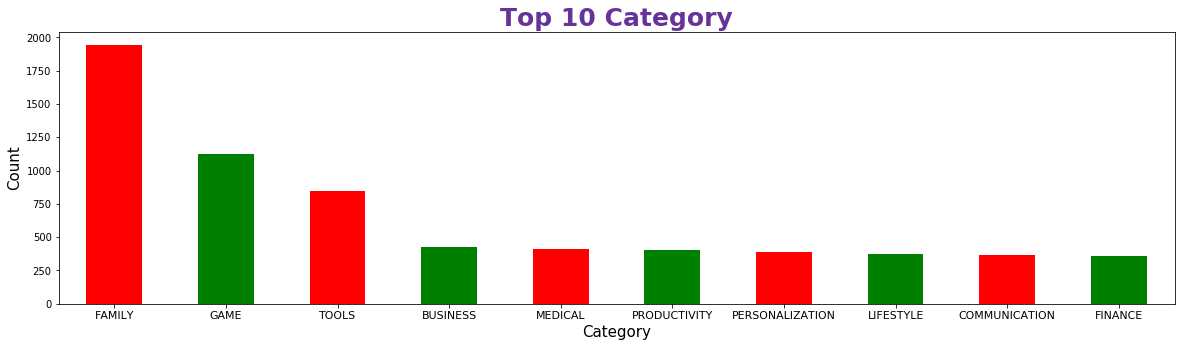

In [205]:
plt.figure(figsize = (20,5))
playstore.category.value_counts(dropna = False).head(10).plot.bar(color = ['red', 'green'])
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 0, size = 11)
plt.title('Top 10 Category', size = 25, color = 'rebeccapurple', weight = 'bold')
plt.show()

In [206]:
import seaborn as sns

In [221]:
vc

FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: category, dtype: int64

In [212]:
top10 = playstore.category.value_counts(dropna = False).head(10).index
top10

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY',
       'PERSONALIZATION', 'LIFESTYLE', 'COMMUNICATION', 'FINANCE'],
      dtype='object')

In [238]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

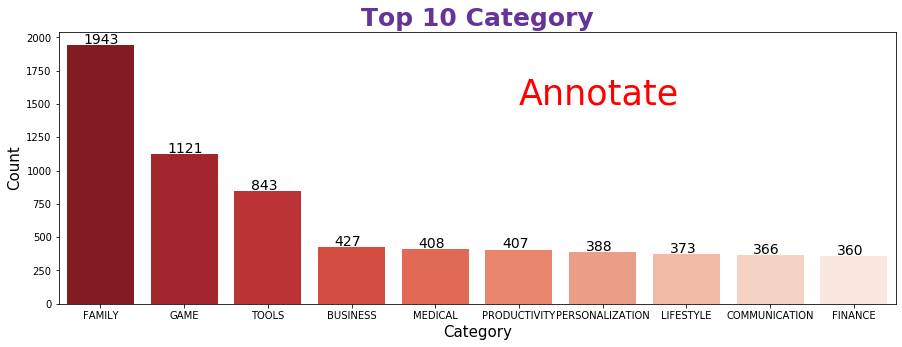

In [242]:
plt.figure(figsize = (15,5))
vc = playstore.category.value_counts(dropna = False).head(10)
top10 = vc.index
sns.countplot(x = 'category', data = playstore[playstore.category.isin(top10)], order = top10, palette= 'Reds_r')
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Top 10 Category', size = 25, color = 'rebeccapurple', weight = 'bold')
plt.annotate('Annotate', xy = (5, 1500), size = 35, color = 'red')
for i in range(10):
    plt.annotate(vc.iloc[i], xy = (i-0.2,vc.iloc[i]+10 ) , size = 14)
plt.show()

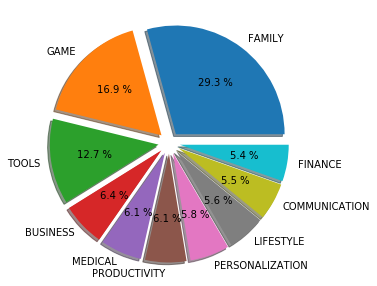

In [253]:
plt.figure(figsize= (10,5))
vc = playstore.category.value_counts(dropna = False).head(10)
vc.plot.pie(radius = 1, explode = [0.1]*10, shadow = True, autopct = '%1.1f %%')
plt.ylabel('')
plt.show()

In [255]:
vc

FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: category, dtype: int64

In [256]:
vc.sum()

6636

In [260]:
pct = 1943/6636 *100
pct

29.279686558167572

In [265]:
print('%0.4f %%'%(pct))

29.2797 %


In [266]:
playstore_na.isnull().sum()

app                  0
category             0
rating               0
reviews              0
size              1468
installs             0
type                 0
price                0
content_rating       0
genres               0
last_updated         0
current_ver          4
android_ver          2
dtype: int64

# Day 11 : 27/07/2020

In [37]:
df = playstore.groupby(['category', 'type'])[['price']].max()

In [42]:
df[df.index.get_level_values('type') == 'Paid']

,,price
category,type,
ART_AND_DESIGN,Paid,1.99
AUTO_AND_VEHICLES,Paid,9.99
BOOKS_AND_REFERENCE,Paid,6.49
BUSINESS,Paid,89.99
COMMUNICATION,Paid,19.99
DATING,Paid,7.99
EDUCATION,Paid,5.99
ENTERTAINMENT,Paid,4.99
EVENTS,Paid,109.99


In [60]:
import datetime as dt
d = dt.date(2020, 7, 27)
d.month, d.year, d.day

(7, 2020, 27)

In [61]:
playstore['month'] = playstore.last_updated.dt.month
playstore['month_year'] = playstore.last_updated.dt.month.astype(str) + '-' + playstore.last_updated.dt.year.astype(str)

In [52]:
playstore.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver', 'Quantile', 'month', 'month_year'],
      dtype='object')

In [53]:
playstore.loc[1:10,['last_updated' , 'month', 'month_year']]

,last_updated,month,month_year
1,2018-01-15,1,1-2018
2,2018-08-01,8,8-2018
3,2018-06-08,6,6-2018
4,2018-06-20,6,6-2018
5,2017-03-26,3,3-2017
6,2018-04-26,4,4-2018
7,2018-06-14,6,6-2018
8,2017-09-20,9,9-2017
9,2018-07-03,7,7-2018
10,2017-10-27,10,10-2017


In [66]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             10357 non-null  object        
 1   category        10357 non-null  object        
 2   rating          8892 non-null   float64       
 3   reviews         10357 non-null  int64         
 4   size            8831 non-null   float64       
 5   installs        10357 non-null  int64         
 6   type            10356 non-null  object        
 7   price           10357 non-null  float64       
 8   content_rating  10357 non-null  object        
 9   genres          10357 non-null  object        
 10  last_updated    10357 non-null  datetime64[ns]
 11  current_ver     10349 non-null  object        
 12  android_ver     10355 non-null  object        
 13  Quantile        10357 non-null  category      
 14  month           10357 non-null  int64         
 15  mo

In [64]:
playstore[playstore.type == 'Free'].groupby('category')[['price']].max()

,price
category,
ART_AND_DESIGN,0.0
AUTO_AND_VEHICLES,0.0
BEAUTY,0.0
BOOKS_AND_REFERENCE,0.0
BUSINESS,0.0
COMICS,0.0
COMMUNICATION,0.0
DATING,0.0
EDUCATION,0.0


# Bivariate Analysis using categorical

## stacked bar chart

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
perx = vc/ vc.sum()*100

In [79]:
vc.iloc[0]

1943

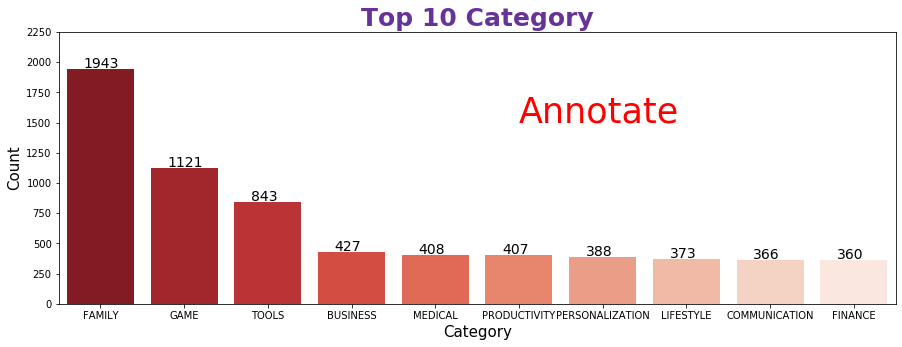

In [80]:
plt.figure(figsize = (15,5))
vc = playstore.category.value_counts(dropna = False).head(10)
top10 = vc.index
sns.countplot(x = 'category', data = playstore[playstore.category.isin(top10)], order = top10, palette= 'Reds_r')
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Top 10 Category', size = 25, color = 'rebeccapurple', weight = 'bold')
plt.annotate('Annotate', xy = (5, 1500), size = 35, color = 'red')
plt.ylim((0,2250))
#plt.xlim((0,11))
for i in range(10):
    plt.annotate(vc.iloc[i], xy = (i-0.2,vc.iloc[i]+10 ) , size = 14)
plt.savefig('barplot.png')
plt.show()

In [91]:
subdata = playstore[playstore.category.isin(top10)]
pd.crosstab(subdata.category, subdata.type).loc[top10]

type,Free,Paid
FAMILY,1755,187
GAME,1038,83
TOOLS,765,78
BUSINESS,415,12
MEDICAL,324,84
PRODUCTIVITY,379,28
PERSONALIZATION,306,82
LIFESTYLE,354,19
COMMUNICATION,339,27
FINANCE,343,17


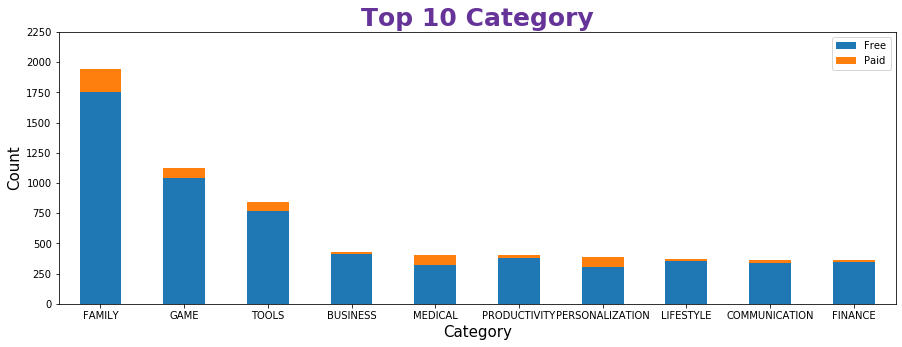

In [102]:
vc = playstore.category.value_counts(dropna = False).head(10)
top10 = vc.index
subdata = playstore[playstore.category.isin(top10)]
vcc = pd.crosstab(subdata.category, subdata.type).loc[top10]
vcc.plot.bar(figsize = (15,5), stacked = True)
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 0)
plt.title('Top 10 Category', size = 25, color = 'rebeccapurple', weight = 'bold')
plt.ylim((0,2250))
plt.savefig('barplot.png')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# plotly

# univariate anlaysis of quantitative data 

In [105]:
playstore.size

165712

    1. Histogram 
    2. Density plot
    3. Box plot 

## Histogram 

In [ ]:
pd.qcut()

In [106]:
playstore.reviews.max()


78158306

In [107]:
playstore.reviews.min()

0

In [ ]:
10 

In [116]:
pd.cut(playstore.reviews, bins =  10, right = False)

0        [0.0, 7815830.6)
1        [0.0, 7815830.6)
2        [0.0, 7815830.6)
3        [0.0, 7815830.6)
4        [0.0, 7815830.6)
               ...       
10836    [0.0, 7815830.6)
10837    [0.0, 7815830.6)
10838    [0.0, 7815830.6)
10839    [0.0, 7815830.6)
10840    [0.0, 7815830.6)
Name: reviews, Length: 10357, dtype: category
Categories (10, interval[float64]): [[0.0, 7815830.6) < [7815830.6, 15631661.2) < [15631661.2, 23447491.8) < [23447491.8, 31263322.4) ... [46894983.6, 54710814.2) < [54710814.2, 62526644.8) < [62526644.8, 70342475.4) < [70342475.4, 78236464.306)]

In [ ]:
(-78158.306, 7815830.6]
excluded    included 

In [109]:
import numpy as np

In [113]:
np.linspace(0, 100,10, retstep = True)

(array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
         44.44444444,  55.55555556,  66.66666667,  77.77777778,
         88.88888889, 100.        ]),
 11.11111111111111)

In [121]:
playstore.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver', 'Quantile', 'month', 'month_year'],
      dtype='object')

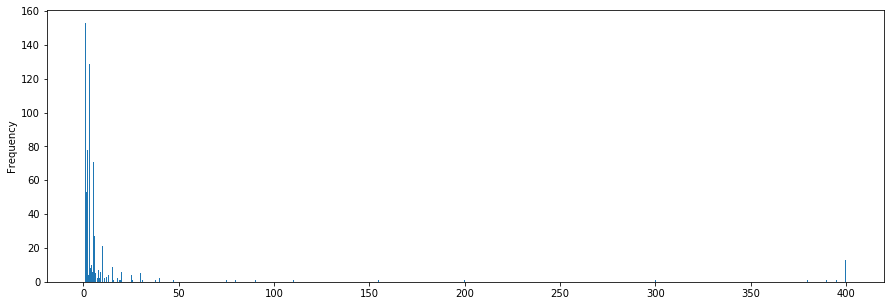

In [125]:
plt.figure(figsize = (15,5))
playstore[playstore.price >0].price.plot.hist(bins = 1000)
plt.show()

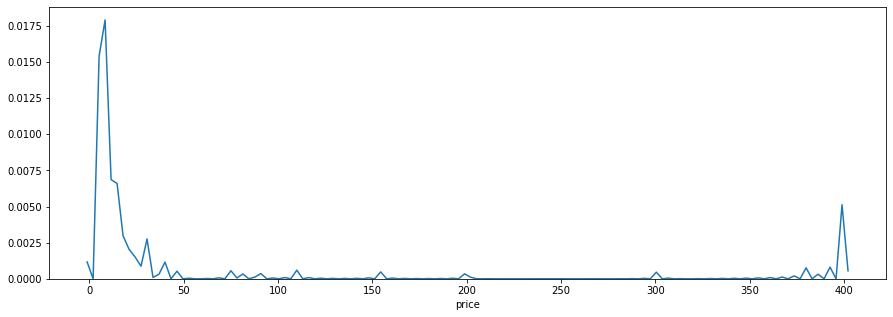

In [128]:
plt.figure(figsize = (15,5))
sns.distplot(playstore[playstore.price >0].price, hist=False)
plt.show()

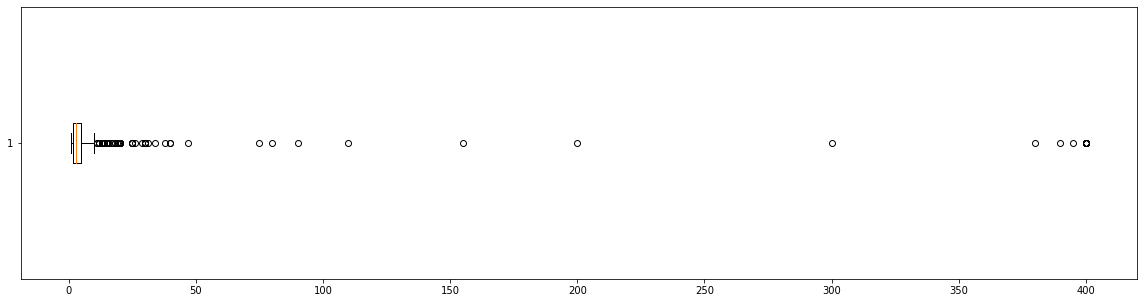

In [133]:
plt.figure( figsize = (20,5))
plt.boxplot(playstore[playstore.price >0].price, vert = False,)
plt.show()

In [146]:
Min = playstore[playstore.price >0].price.min()
Q1 = playstore[playstore.price >0].price.quantile(0.25)
Q2 = playstore[playstore.price >0].price.quantile(0.5)
Q3 = playstore[playstore.price >0].price.quantile(0.75)
Max = playstore[playstore.price >0].price.max()

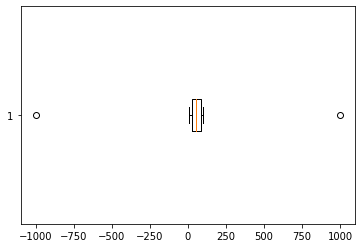

In [165]:
d = pd.Series([-1000, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000])
plt.boxplot(d, vert = False)
plt.show()

In [164]:
d.mean(),d.median(), d.quantile(0.75), d.quantile(0.25)

(140.9090909090909, 60.0, 85.0, 35.0)

In [166]:
IQR = d.quantile(0.75) - d.quantile(0.25)


In [170]:
85 + 1.5 *IQR  # Inter quartile range

167.5

In [ ]:
# till 1.5times IQR
# at eacch end the whiShker will termminate at either 1.5IQR or min/max whichevver falls firat 

In [171]:
# bivariate


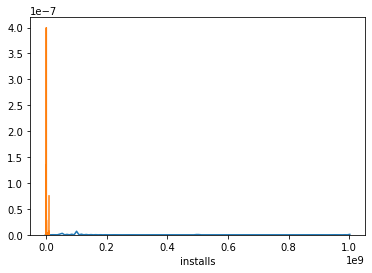

In [183]:
# 1 - 1 ccategorical & other cont
sns.distplot(playstore[playstore.type == 'Free'].installs, hist = False)
sns.distplot(playstore[playstore.type == 'Paid'].installs, hist = False)

/Users/nimisha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         9.210340
1        13.122363
2        15.424948
3        17.727534
4        11.512925
           ...    
10836     8.517193
10837     4.605170
10838     6.907755
10839     6.907755
10840    16.118096
Name: installs, Length: 9591, dtype: float64

In [185]:
cars = pd.read_csv('~/Desktop/Purdue/Python/Batch_2/Data/cars.csv')

In [186]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


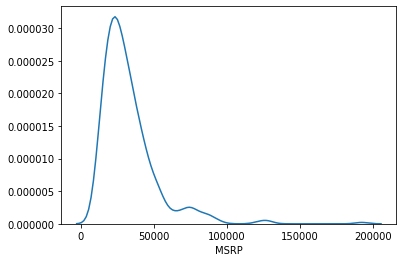

In [188]:
sns.distplot(cars.MSRP, hist = False)
plt.show()

In [189]:
cars.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

## top5 Makes

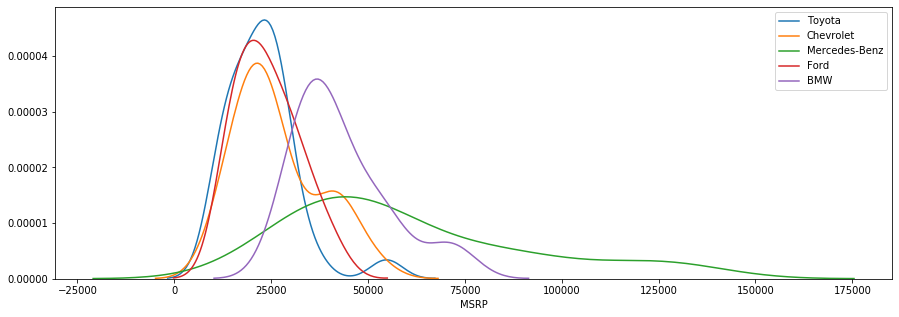

In [195]:
top5 = cars.Make.value_counts()[:5].index
top5

subdata = cars[cars.Make.isin(top5)]

plt.figure(figsize = (15,5))
for i in top5:
    sns.distplot(subdata[subdata.Make==i].MSRP, hist = False, label = i)
plt.show()

In [197]:
subdata.groupby('Make')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
BMW,20.0,43285.250000,12459.756532,28495.0,35095.0,38995.0,49195.0,73195.0
Chevrolet,27.0,26587.037037,10887.944574,11690.0,19625.0,23495.0,33197.5,51535.0
Ford,23.0,24015.869565,7952.490269,13270.0,17910.0,22515.0,29525.0,41475.0
Mercedes-Benz,26.0,60656.807692,30508.759951,26060.0,37930.0,51395.0,76232.5,128420.0
Toyota,28.0,22524.464286,9022.429699,10760.0,16195.0,22267.5,26522.5,54765.0


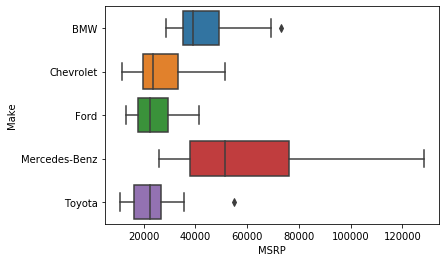

In [198]:
sns.boxplot(x = 'MSRP', y = 'Make', data = subdata)

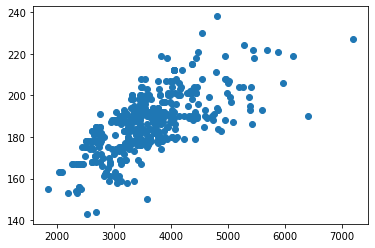

In [208]:
plt.plot(cars.Weight, cars.Length,'o')
plt.show()

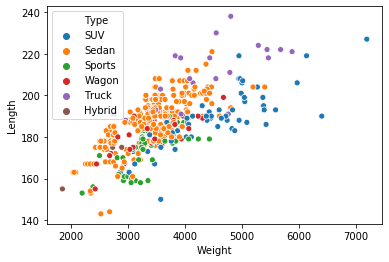

In [203]:
sns.scatterplot('Weight', 'Length', hue = 'Type', data = cars)